In [1]:
import csv
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def return_rows(filename, file_encoding = 'rU'):
  with open(filename, file_encoding) as f: 
    reader = csv.reader(f)
    rowsInData = [row for row in reader]
  return rowsInData  

In [3]:
single_faces = return_rows("../data-labels/AliseLabels_raw/00_1_face_textfile.txt")
multiple_faces = return_rows("../data-labels/AliseLabels_raw/00_2_or_more_textfile.txt")
single_faces.pop()
multiple_faces.pop()

['C:\\Users\\Hon Sun\\Desktop\\Alise\\Manovich\\on broadway nypl\\1 or 2 faces\\broadway_samples_to_label\\00_2_or_more\\textfile.txt ']

In [4]:
single_face_images = [single_face[0].split("\\")[-1].strip() for single_face in single_faces]
multiple_face_images = [multiple_face[0].split("\\")[-1].strip() for multiple_face in multiple_faces]

In [5]:
broadway_meta = return_rows("../data-labels/broadway_sample.csv")
opencv_outputs = pd.DataFrame({'images': [b[0] for b in broadway_meta[1:]], 'OpenCV.output': [b[-2] for b in broadway_meta[1:]]})

In [6]:
src_path, image_type = "../images/", (".jpg", ".JPG")
image_paths = []  
for root, dirs, files in os.walk(src_path):
  image_paths.extend([os.path.join(root, f) for f in files if f.endswith(image_type)])

In [7]:
images = [image_path.split("/")[-1] for image_path in image_paths]

In [8]:
labels = []
for image in images:
    if image in single_face_images: labels.append([[image, "single face"]])
    elif image in multiple_face_images: labels.append([[image,"multiple faces"]])
    else: labels.append([[image, "no faces"]])

In [9]:
labels_df = pd.DataFrame({'images': [label[0][0] for label in labels], 'label': [label[0][1] for label in labels]})

In [10]:
res = pd.merge(labels_df, opencv_outputs, on = 'images')

In [11]:
human_labels = list(res['label'])
opencv_labels = list(res['OpenCV.output'])

In [12]:
opencv_label_names = []
for opencv_label in opencv_labels:
    if int(opencv_label) == 0: opencv_label_names.append("no faces")
    if int(opencv_label) == 1: opencv_label_names.append("single face")
    if int(opencv_label) > 1: opencv_label_names.append("multiple faces")

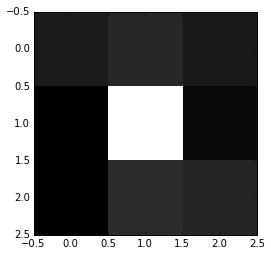

In [13]:
cm = confusion_matrix(human_labels, opencv_label_names)
plt.imshow(cm, interpolation='nearest', cmap = plt.gray())

In [14]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [15]:
cm_normalized

array([[ 0.30474934,  0.41952507,  0.27572559],
       [ 0.00287356,  0.96264368,  0.03448276],
       [ 0.01223242,  0.53211009,  0.45565749]])

In [16]:
cm

array([[ 231,  318,  209],
       [   6, 2010,   72],
       [   8,  348,  298]])

In [27]:
len(set(single_face_images).intersection(images))

654

In [29]:
len(multiple_face_images)

758